In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import pickle

In [2]:
%%bash
cd ..
rm -rf models
mkdir models

In [3]:
df = pd.read_csv("retail_data.csv")

In [4]:
df.columns

Index(['Product_id', 'Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'Petrol_price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169211 entries, 0 to 169210
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product_id        169211 non-null  int64 
 1   Product_Code      169211 non-null  object
 2   Warehouse         169211 non-null  object
 3   Product_Category  169211 non-null  object
 4   Date              169211 non-null  object
 5   Order_Demand      169211 non-null  int64 
 6   Open              169211 non-null  int64 
 7   Promo             169211 non-null  int64 
 8   StateHoliday      169211 non-null  object
 9   SchoolHoliday     169211 non-null  int64 
 10  Petrol_price      169211 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 14.2+ MB


In [6]:
df.describe()

,Product_id,Order_Demand,Open,Promo,SchoolHoliday,Petrol_price
count,1.692110e+05,1.692110e+05,169211.000000,169211.000000,169211.000000,169211.000000
mean,9.528887e+05,5.248118e+03,0.817742,0.395364,0.133401,87.986183
std,5.555751e+04,3.116296e+04,0.386058,0.488930,0.340009,4.909978
min,6.909430e+05,0.000000e+00,0.000000,0.000000,0.000000,80.000000
25%,9.054275e+05,2.000000e+01,1.000000,0.000000,0.000000,84.000000
50%,9.526430e+05,3.000000e+02,1.000000,0.000000,0.000000,88.000000
75%,1.001416e+06,2.000000e+03,1.000000,1.000000,0.000000,92.000000
max,1.048574e+06,2.500000e+06,1.000000,1.000000,1.000000,96.000000


In [7]:
df.shape

(169211, 11)

In [8]:
df.head()

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,01/03/2016,16000,1,0,0,0,91
1,786743,Product_1825,Whse_S,Category_006,01/03/2016,50000,1,0,0,0,85
2,786967,Product_0551,Whse_S,Category_030,01/03/2016,3000,1,0,0,0,85
3,786856,Product_0556,Whse_S,Category_030,01/03/2016,1000,1,0,0,0,93
4,899538,Product_1844,Whse_A,Category_018,01/03/2016,7,1,0,0,0,95


In [9]:
def preprocess(df):
    #print(df.head())
    
    df.dropna(inplace=True)

    df.drop_duplicates(inplace=True)

    df["Date"] = pd.to_datetime(df["Date"])

    df["Product_Code"] = df["Product_Code"].apply(lambda x : x.split("_")[1])

    df["Warehouse"] = df["Warehouse"].apply(lambda x : x.split("_")[1])

    df["Product_Category"] = df["Product_Category"].apply(lambda x : int(x.split("_")[1]))

    df["Warehouse"] = df["Warehouse"].replace({"A" : 0 , "C":1 , "J": 2 , "S":3})

    df["Product_Code"] =  df["Product_Code"].apply(lambda x : int(x))

    df["StateHoliday"] = df["StateHoliday"].astype("bool")

    df["SchoolHoliday"] = df["SchoolHoliday"].astype("bool")

    df["Open"] = df["Open"].astype("bool")

    df["Promo"] = df["Promo"].astype("bool")
        
    return df

In [10]:
df = preprocess(df)

In [11]:
df.head()

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,33,3,5,2016-01-03,16000,True,False,True,False,91
1,786743,1825,3,6,2016-01-03,50000,True,False,True,False,85
2,786967,551,3,30,2016-01-03,3000,True,False,True,False,85
3,786856,556,3,30,2016-01-03,1000,True,False,True,False,93
4,899538,1844,0,18,2016-01-03,7,True,False,True,False,95


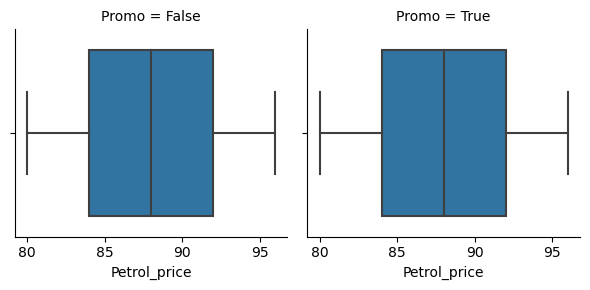

In [12]:
temp = sns.FacetGrid(df,col="Promo")
temp.map_dataframe(sns.boxplot,"Petrol_price")

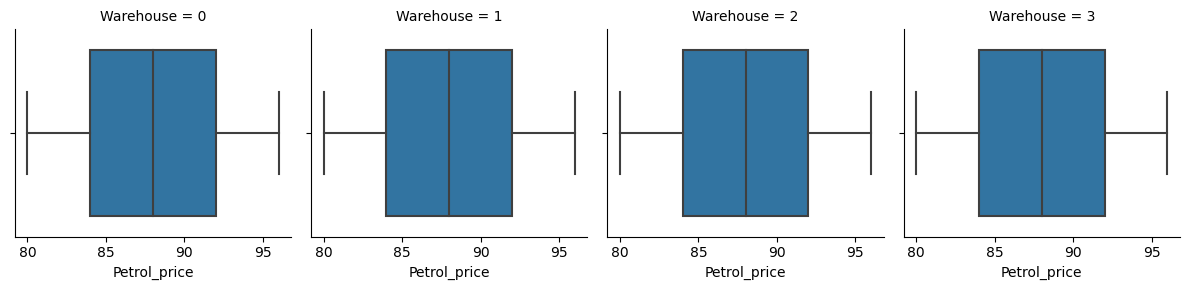

In [13]:
temp = sns.FacetGrid(df,col="Warehouse")
temp.map_dataframe(sns.boxplot,"Petrol_price")

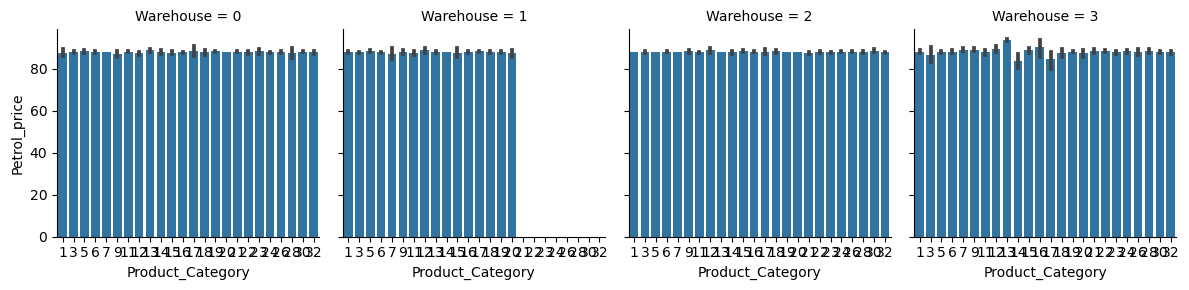

In [14]:
temp = sns.FacetGrid(df,col="Warehouse")
temp.map_dataframe(sns.barplot,"Product_Category","Petrol_price")
plt.show()

In [15]:
#sns.pairplot(df[["Petrol_price","Order_Demand"]],kind="kde")

In [16]:
#Performing adf test to determine whether the data is stationary for ARIMA

In [17]:
adf_result = adfuller(df[['Petrol_price']].iloc[:1000,:])

In [18]:
adf_result 

(-31.490428957065348,
 0.0,
 0,
 999,
 {'1%': -3.4369127451400474,
  '5%': -2.864437475834273,
  '10%': -2.568312754566378},
 5854.840714720883)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169211 entries, 0 to 169210
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product_id        169211 non-null  int64         
 1   Product_Code      169211 non-null  int64         
 2   Warehouse         169211 non-null  int64         
 3   Product_Category  169211 non-null  int64         
 4   Date              169211 non-null  datetime64[ns]
 5   Order_Demand      169211 non-null  int64         
 6   Open              169211 non-null  bool          
 7   Promo             169211 non-null  bool          
 8   StateHoliday      169211 non-null  bool          
 9   SchoolHoliday     169211 non-null  bool          
 10  Petrol_price      169211 non-null  int64         
dtypes: bool(4), datetime64[ns](1), int64(6)
memory usage: 11.0 MB


In [20]:
df.drop(columns=["Product_id","Product_Code"],inplace=True)

In [21]:
df.head()

,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,3,5,2016-01-03,16000,True,False,True,False,91
1,3,6,2016-01-03,50000,True,False,True,False,85
2,3,30,2016-01-03,3000,True,False,True,False,85
3,3,30,2016-01-03,1000,True,False,True,False,93
4,0,18,2016-01-03,7,True,False,True,False,95


In [22]:
df_main = df

In [23]:
df.sort_values("Date" , inplace=True)

In [24]:
df.set_index("Date",inplace=True)

In [25]:
df.index = pd.to_datetime(df.index)

In [26]:
x_train , x_test , y_train , y_test = train_test_split(df.drop(columns="Petrol_price") , df["Petrol_price"] , random_state = 10 , test_size = 0.2)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((135368, 7), (33843, 7), (135368,), (33843,))

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
def plot(y_test, y_pred):
    
    print("RMSPE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    
    plt.scatter(y_test, y_pred ,  alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.show()

    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.show()

In [29]:
#ARIMA Forecasting based on the warehouse 2

In [30]:
df2 = df[df["Warehouse"]==2]

print(df2.shape)

## Total number to days we have

print(len(df2.groupby("Date").agg({"Petrol_price": "mean"}).reset_index()["Date"].value_counts()))

df2=df2.groupby("Date").agg({"Petrol_price": "mean"})

(131102, 8)
242


In [31]:
df2 = df2.asfreq('D')

In [32]:
df2['Petrol_price'] = df2['Petrol_price'].fillna(method='ffill')

In [33]:
df2.head()

,Petrol_price
Date,
2016-01-05,88.259338
2016-01-06,88.043339
2016-01-07,87.527397
2016-01-08,88.245347
2016-01-09,88.245347


In [34]:
from statsmodels.tsa.arima.model import ARIMA

In [35]:
model = ARIMA(df2["Petrol_price"],order=(1,1,1))
model = model.fit()
forecast = model.forecast(steps=30)
print(forecast)

2016-11-23    87.990494
2016-11-24    88.043369
2016-11-25    88.053170
2016-11-26    88.054987
2016-11-27    88.055324
2016-11-28    88.055386
2016-11-29    88.055398
2016-11-30    88.055400
2016-12-01    88.055400
2016-12-02    88.055401
2016-12-03    88.055401
2016-12-04    88.055401
2016-12-05    88.055401
2016-12-06    88.055401
2016-12-07    88.055401
2016-12-08    88.055401
2016-12-09    88.055401
2016-12-10    88.055401
2016-12-11    88.055401
2016-12-12    88.055401
2016-12-13    88.055401
2016-12-14    88.055401
2016-12-15    88.055401
2016-12-16    88.055401
2016-12-17    88.055401
2016-12-18    88.055401
2016-12-19    88.055401
2016-12-20    88.055401
2016-12-21    88.055401
2016-12-22    88.055401
Freq: D, Name: predicted_mean, dtype: float64


<AxesSubplot: ylabel='predicted_mean'>

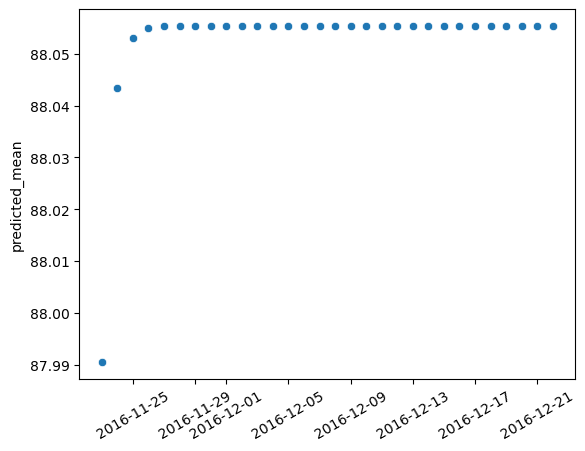

In [36]:
plt.xticks(rotation=30)
sns.scatterplot(forecast)

In [37]:
with open("../models/arima.pkl" ,"wb") as f:
    pickle.dump(model , f)

In [38]:
## ARIMA exogenous 

In [39]:
# df_main.head(2)

In [40]:
# df_main["Open"]=df_main["Open"].astype("int")
# df_main["Promo"]=df_main["Promo"].astype("int")
# df_main["StateHoliday"]=df_main["StateHoliday"].astype("int")
# df_main["SchoolHoliday"]=df_main["SchoolHoliday"].astype("int")

In [41]:
# df_main.head(2)

In [42]:
# model_arimax = ARIMA(df_main["Petrol_price"], order=(1, 1, 1), exog=df_main.drop(columns=["Petrol_price"]))
# model_arimax = model_arimax.fit()
# forecast = model_arimax.forecast(steps=10)
# print(forecast)

In [43]:
#Prophet 

In [44]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [45]:
df2= df2.reset_index().rename(columns={"Date":"ds","Petrol_price":"y"})

In [46]:
df2['ds'] = pd.to_datetime(df2['ds'])

In [47]:
df2.shape

(323, 2)

In [48]:
model = Prophet()
model.fit(df2)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
print(forecast)

04:31:09 - cmdstanpy - INFO - Chain [1] start processing
04:31:09 - cmdstanpy - INFO - Chain [1] done processing


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2016-01-05  87.126666   85.812866   88.526672    87.126666    87.126666   
1   2016-01-06  87.146222   85.763204   88.508390    87.146222    87.146222   
2   2016-01-07  87.165779   85.962834   88.662060    87.165779    87.165779   
3   2016-01-08  87.185335   85.911156   88.521178    87.185335    87.185335   
4   2016-01-09  87.204892   86.015898   88.741153    87.204892    87.204892   
..         ...        ...         ...         ...          ...          ...   
348 2016-12-18  87.586574   85.717826   88.407609    87.522524    87.659440   
349 2016-12-19  87.577374   86.123643   88.835879    87.507910    87.655171   
350 2016-12-20  87.568173   86.385867   89.017420    87.493648    87.651213   
351 2016-12-21  87.558972   86.353081   88.875671    87.480249    87.647027   
352 2016-12-22  87.549771   86.365372   89.044409    87.465730    87.642722   

     additive_terms  additive_terms_lower  additive

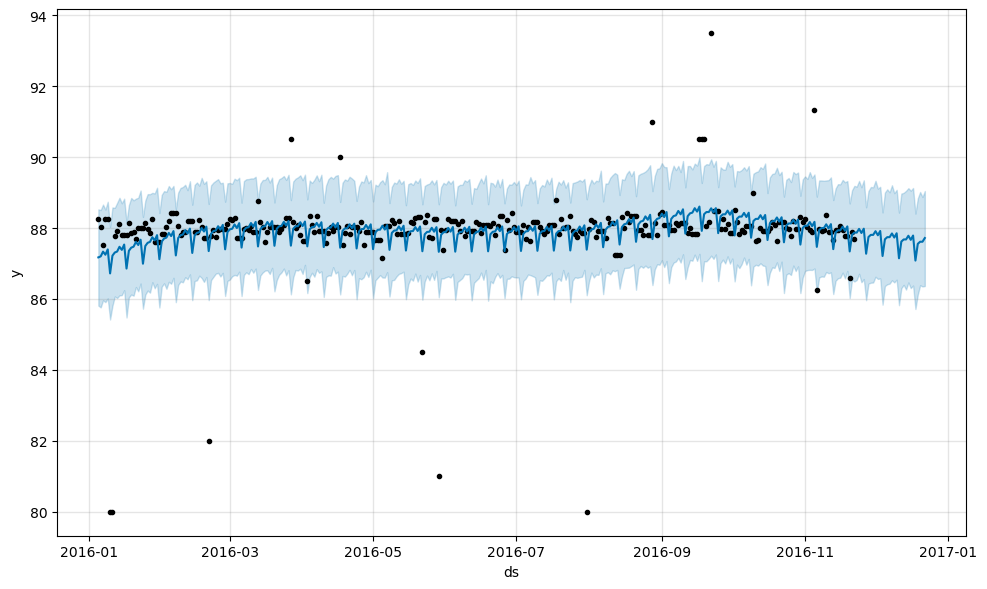

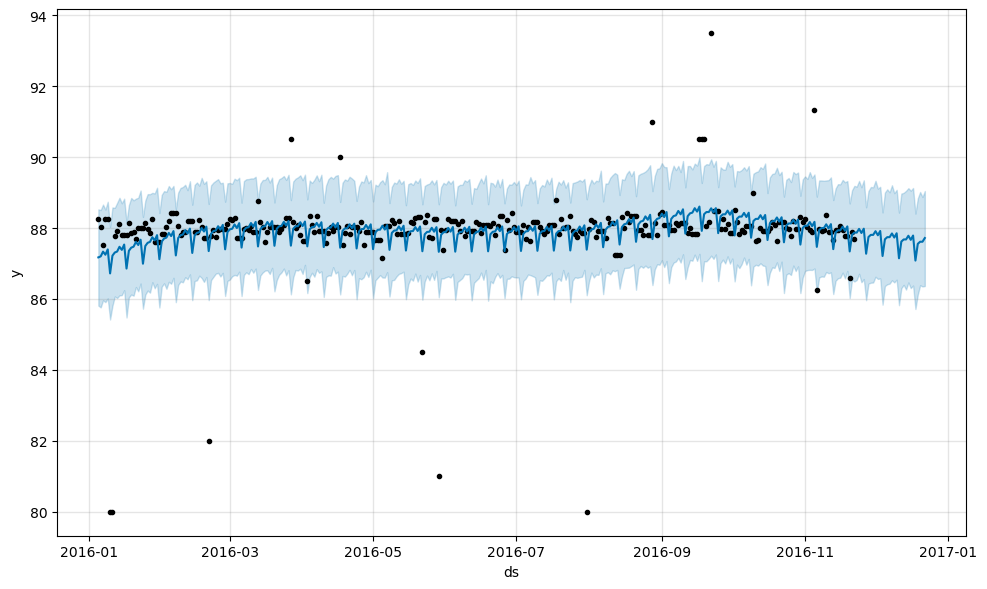

In [49]:
model.plot(forecast)

In [50]:
with open("../models/prophet.pkl" , "wb") as f:
    pickle.dump(model , f)

In [51]:
##Decision Tree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

RMSPE: 5.173859504116158


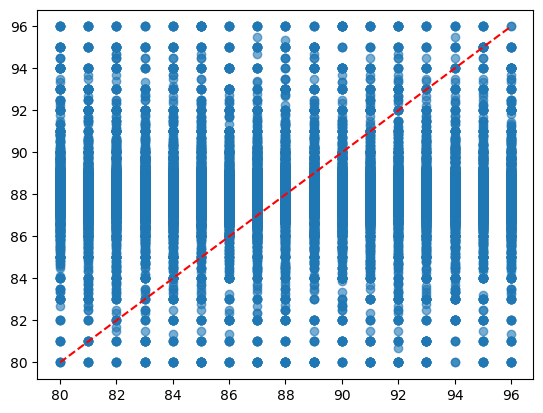

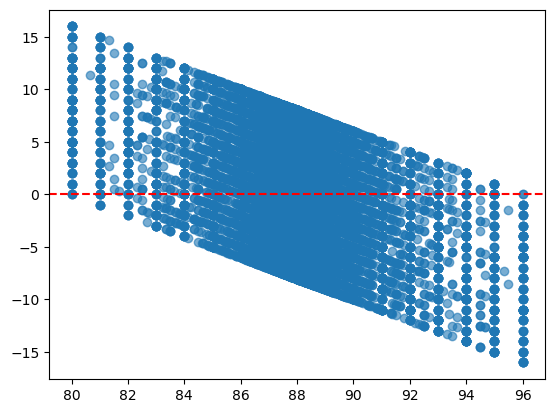

In [54]:
plot(y_test, y_pred)

In [55]:
with open("../models/dt.pkl" , "wb") as f:
    pickle.dump(dt_model , f)

In [56]:
##Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

RMSPE: 5.049080849182255


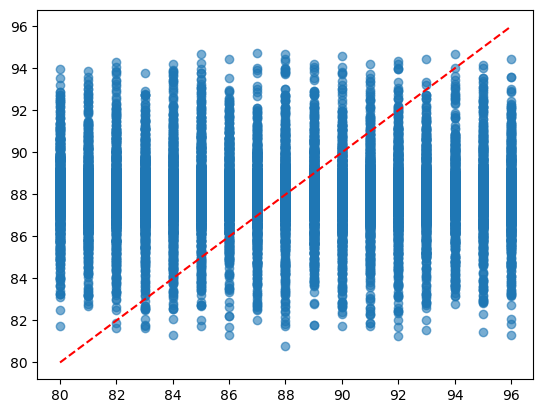

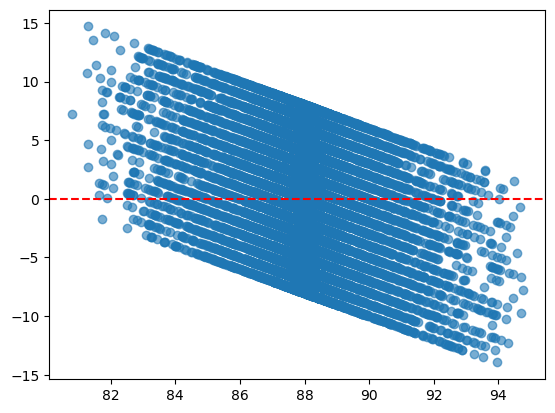

In [59]:
plot(y_test, y_pred)

In [60]:
with open("../models/rf.pkl" , "wb") as f:
    pickle.dump(rf_model , f)

In [61]:
## XGBRegressor

In [62]:
from xgboost import XGBRegressor

In [63]:
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

RMSPE: 4.926147211666936


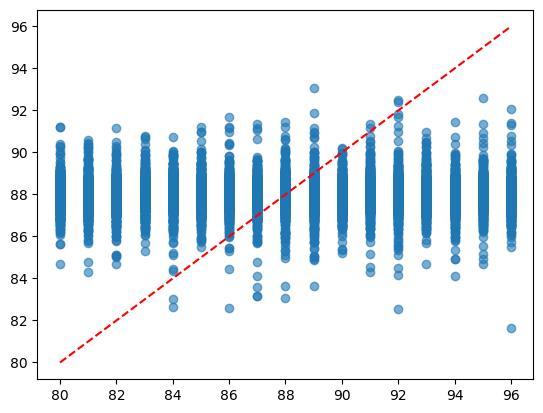

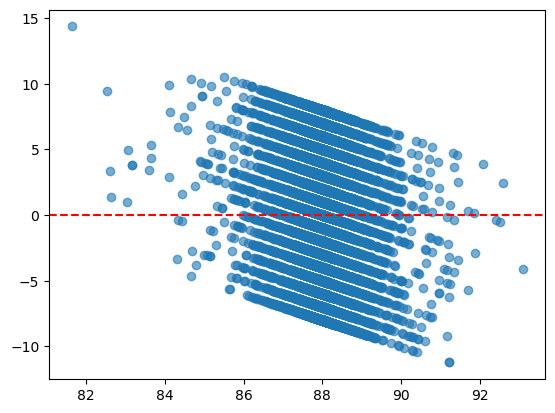

In [64]:
plot(y_test, y_pred)

In [65]:
with open("../models/xgb.pkl" , "wb") as f:
    pickle.dump(xgb_model , f)

In [66]:
sc = StandardScaler()
df[["Order_Demand","Petrol_price"]] = pd.DataFrame(sc.fit_transform(df[["Order_Demand","Petrol_price"]]))

x_train , x_test , y_train , y_test = train_test_split(df.drop(columns="Petrol_price") , df["Petrol_price"] , random_state = 10 , test_size = 0.2)

x_train.shape , x_test.shape , y_train.shape , y_test.shape

##Linear regression

from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
plot(y_test, y_pred)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values